# Import libraries and packages 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

upload the dataset into jupyter notebook 

In [2]:
# upload the dataset into jupyter notebook 
df = pd.read_csv("Desktop\Telco_Customer_Churn.csv")
# data frame 
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4273,3814-MLAXC,Female,0,No,No,31,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),79.85,2404.15,Yes
1777,2155-AMQRX,Female,0,No,No,28,Yes,Yes,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),54.90,1505.15,No
1439,0506-LVNGN,Female,1,No,No,5,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),75.55,349.65,Yes
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
1427,6896-SRVYQ,Male,1,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,73.85,3122.4,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Prepare the dataset before going into deep learning 

# drop the customer ID culomn because it is useless 

In [6]:
# Because of the customerID is useless so i deciced to drop it 
df.drop('customerID',axis='columns',inplace=True)

In [7]:
# showing all the columns along with their data type after drop the customer ID column 
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# TotalCharges should be float but it is an object

In [8]:
# Now most of the columns has an integer or float values except the Total Charge 
# So i will change this column value into float value
# first take a look at the values of the Totalcharges to make sure they are numbers 
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
# apply numeric method 
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [10]:
# set the value of error to 'coerce' is to avoid the above error 
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
# display the how many rows has empty value for the Total Charge 
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
# display how many rows and columns in the dataset 
df.shape

(7043, 20)

In [13]:
# display a specific value by using iloc
# and here i want to see the Total Charge column in the row 488
df.iloc[488].TotalCharges

' '

In [14]:
# set a new dataframe and called it df1 
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# set the Total Charge to numbers instead of object again after getting rid of the pervious error and clearing all 
# the empty values 
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
# check the previous function if it works
df1.TotalCharges.dtypes

dtype('float64')

The number of how many customers are leaving the company

# Many of the columns are yes, no etc. print unique values in object columns to see data values

In [18]:
# Display the unique or the object values for each column
# define a function 
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [19]:
# call the function 
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


# Some of the columns have "no internet service" or "no phone service", that can be replaced with a simple No

In [20]:
# Replace these 2 unique values to only no beacause i only want to display Yes or No values
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Convert Yes and No into 1 and 0 

In [22]:
# columns has valuse only 'Yes' or 'No' and replace these values into 1 or 0 
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
# Print out all the unique values to check if the previous function works or not
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


convert the culomn of the gender also to 0 and 1 

In [24]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [25]:
df1.gender.unique()

array([1, 0], dtype=int64)

# One hot encoding for categorical columns

In [26]:
# for the columns that have more than 2 values we can show each value as a column
# but once one of the column has a value of 1 the rest will be 0
# in this example : Internet service has 3 columns/values : 'DSL' 'Fiber optic' 'No'
# Contract: ['Month-to-month' 'One year' 'Two year']
#PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)''Credit card (automatic)'
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5552,0,0,1,1,22,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
124,1,0,1,1,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5314,1,0,1,0,70,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,0
3683,0,0,1,0,71,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
1453,0,0,0,0,31,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [28]:
# now all the coumns are numbers 
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [29]:
# Scaling the culomns that have values which are not "1" or "0" 
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

# import minMaxScaler which basically convert all the values to between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [30]:
# example on how now the above chosen columns and their values look like
# as can be seen from the output the value converted into only between 1 and 0
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4128,0,0,0,0,0.788732,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
6288,0,0,0,0,0.014085,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6249,0,0,0,0,0.028169,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
# print out all the unique values 
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Data Visualization

Display the tenure

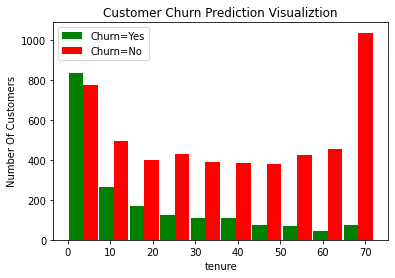

In [32]:
# display the period of how long the customer stay with the company and  is not leaving 
tenure_churn_no = df[df.Churn=='No'].tenure
# # display the period of how long the customer stay with the company and he is leaving 
tenure_churn_yes = df[df.Churn=='Yes'].tenure

# Label x and y axis to a value 
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

# plot the list of the churn customers as a chart
# use label do decribe each color belongs to
# to display the label we have to use ( legend())
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Display the Monthly Charges

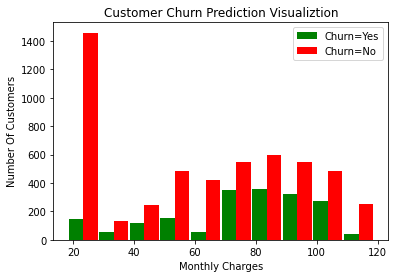

In [33]:
# display the Monthly Charges of the customer who is not leaving 
tenure_churn_no = df[df.Churn=='No'].MonthlyCharges
# display the Monthly Charges of the customer who is leaving 
tenure_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

# Label x and y axis to a value 
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

# plot the list of the churn customers as a chart
# use label do decribe each color belongs to
# to display the label we have to use ( legend())
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [34]:
import seaborn as sns
def pairplot(dataset, target_column):
    sns.set(style="ticks")
    sns.pairplot(dataset, hue=target_column)
    plt.show()

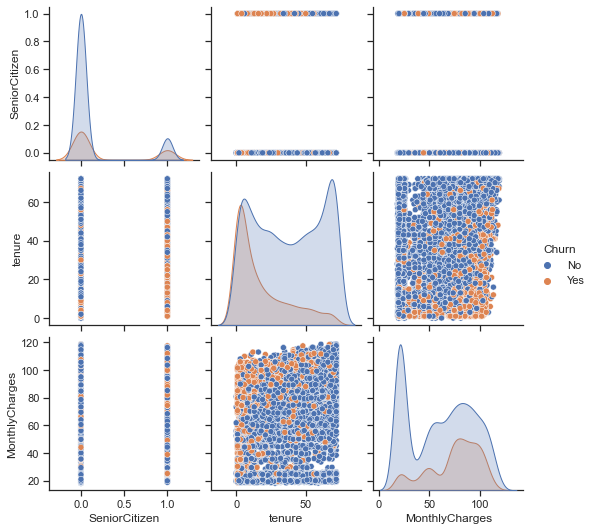

In [35]:
pairplot(df, "Churn")

# Now the dataset is ready 

# Train and split 

In [36]:
# set x and y
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# split the dataset into training and testing samples
# 80% using for training and 20% are using for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [37]:
X_train.shape

(5625, 26)

In [38]:
X_test.shape

(1407, 26)

In [39]:
X_test[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2660,0,0,0,1,0.169014,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
744,1,0,0,0,0.056338,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5579,1,0,1,1,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
64,1,0,0,0,0.112676,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3287,0,0,1,1,0.253521,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
816,1,0,0,0,0.014085,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2670,1,0,1,1,0.704225,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5920,1,1,0,0,0.352113,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1023,1,1,1,0,0.619718,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6087,0,0,0,1,0.352113,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


# Built a model (ANN) in tensorflow/Keras

In [40]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# Create the model 
# add the input layers ( Hidden layers )
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
              
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              

history=model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=50,batch_size=200, verbose=2)

Epoch 1/50
29/29 - 1s - loss: 0.7061 - accuracy: 0.4676 - val_loss: 0.6590 - val_accuracy: 0.6745 - 514ms/epoch - 18ms/step
Epoch 2/50
29/29 - 0s - loss: 0.6090 - accuracy: 0.7340 - val_loss: 0.5900 - val_accuracy: 0.7107 - 61ms/epoch - 2ms/step
Epoch 3/50
29/29 - 0s - loss: 0.5394 - accuracy: 0.7419 - val_loss: 0.5394 - val_accuracy: 0.7249 - 62ms/epoch - 2ms/step
Epoch 4/50
29/29 - 0s - loss: 0.4916 - accuracy: 0.7636 - val_loss: 0.5000 - val_accuracy: 0.7512 - 62ms/epoch - 2ms/step
Epoch 5/50
29/29 - 0s - loss: 0.4591 - accuracy: 0.7876 - val_loss: 0.4777 - val_accuracy: 0.7733 - 61ms/epoch - 2ms/step
Epoch 6/50
29/29 - 0s - loss: 0.4422 - accuracy: 0.7890 - val_loss: 0.4673 - val_accuracy: 0.7768 - 64ms/epoch - 2ms/step
Epoch 7/50
29/29 - 0s - loss: 0.4336 - accuracy: 0.7970 - val_loss: 0.4619 - val_accuracy: 0.7740 - 64ms/epoch - 2ms/step
Epoch 8/50
29/29 - 0s - loss: 0.4291 - accuracy: 0.7988 - val_loss: 0.4583 - val_accuracy: 0.7761 - 62ms/epoch - 2ms/step
Epoch 9/50
29/29 - 0s 

In [41]:
# evaluate the model
scores= model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.7910


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


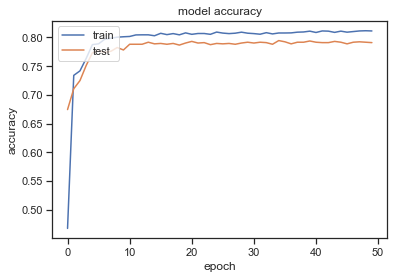

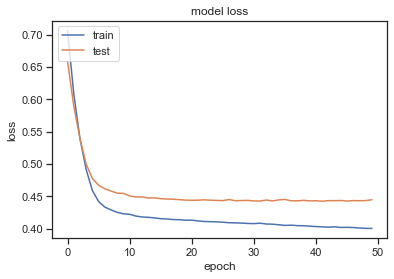

In [42]:
import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# give the name of the plot as ' model accuracy '
plt.title('model accuracy')
# plot the y label as accuracy
plt.ylabel('accuracy')
# plot the x label as epoch
plt.xlabel('epoch')
# Place a legend on the axes.
# The location of the legend is ' upper left ' 
plt.legend(['train', 'test'], loc='upper left')
# display  or show the plot
plt.show()


# summarize history for loss
# Create the plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# give the name of the plot as ' model loss '
plt.title('model loss')
# plot the y label as 'loss'
plt.ylabel('loss')
# plot the x label as 'epoch'
plt.xlabel('epoch')
# Place a legend on the axes.
# The location of the legend is ' upper left ' 
plt.legend(['train', 'test'], loc='upper left')
# display or show the plot
plt.show()

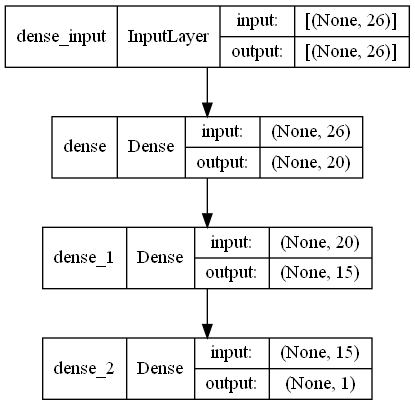

In [43]:
#Analyze the code and sketch the diagram of the network structure
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ready to predict 

In [48]:
# predict the test
yp = model.predict(X_test)
yp[:5]

array([[0.2536658 ],
       [0.37246376],
       [0.00994802],
       [0.82616514],
       [0.64066344]], dtype=float32)

In [49]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [50]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [51]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

classification report 

In [52]:
# import confusion matrix and classification report 
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       999
           1       0.65      0.60      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



Text(66.5, 0.5, 'Truth')

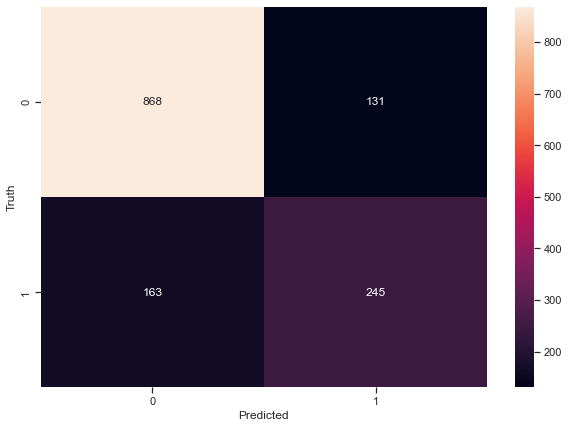

In [53]:
# visualize the predict and truth values 
# See the correlation between dateset using seaborn library and heatmap function 
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

accuracy 

In [57]:
# print out the accuracy using math calculation 
round((868+245)/(868+245+131+163),2)

0.79

Precision for 0 class. i.e. Precision for customers who did not churn

In [58]:
round(868/(868+163),2)

0.84

Precision for 1 class. i.e. Precision for customers who actually churned

In [59]:
round(245/(245+131),2)

0.65

Recall for 0 class

In [60]:
round(868/(868+131),2)

0.87

Recall for 1 class

In [62]:
round(245/(245+163),2)

0.6

# check the important features 

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=5).fit(X_train, y_train)

In [64]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

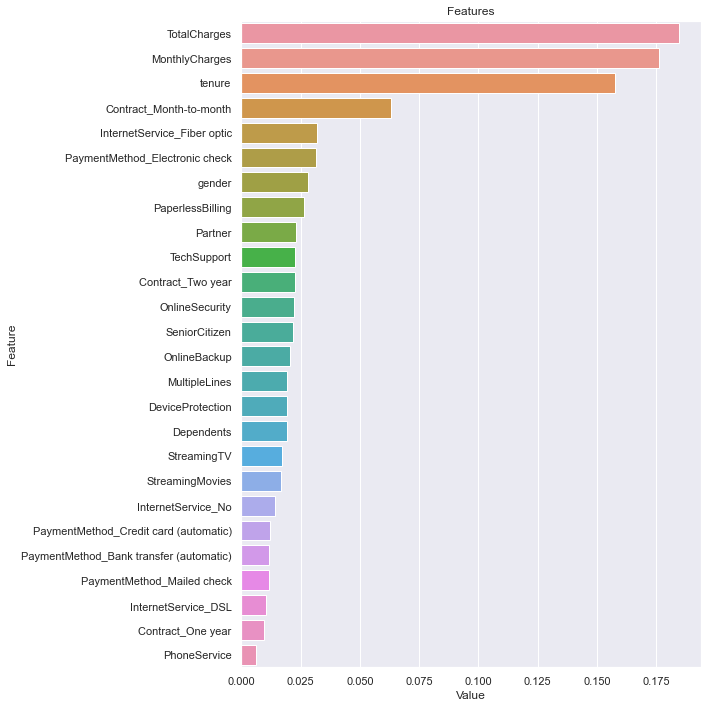

In [65]:
plot_importance(rf_model, X_train)